In [1]:
import pandas as pd
import matplotlib.patches as patches

In [2]:
# Glacier ablation over 2000-2016 (Miles et al. 2021, Supp. Tab. 4)
TotAbl_BV = {'INDUS' : 17.7} # Gt/a
ImAbl_BV = {'INDUS' : 6.2} # Gt/a
TotAblUnc_BV = {'INDUS' : 3.64} # Gt/a
# Basin area in sq km
BasinArea_BV = {'INDUS': 865012.6}

In [3]:
# Fill the above dictionnaries to repeat the analysis with BRAHMAPUTRA GANGES
BV='INDUS'

In [4]:
# Convert to mm
BasinArea = BasinArea_BV[BV]
TotAbl = TotAbl_BV[BV]
ImAbl = ImAbl_BV[BV]
TotAbl_mm = 1e6*TotAbl/BasinArea
TotAblUnc_mm = 1e6*TotAblUnc_BV[BV]/BasinArea

In [5]:
# Function to read tables created by hmasr-mosaic.sh
def readTable(f):
    df = pd.read_csv(f,sep=' ', header=0, index_col=0)
    df = df.rename(columns=int, index=int)
    df.index.name = 'Day of year'
    df.columns.name = 'Year'
    return df

In [6]:
# Load data
snowmelt_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SNOWMELT_'+BV+'.csv')
snowmelt_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SNOWMELT_'+BV+'.csv')
sublim_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SUBLIM_'+BV+'.csv')
sublim_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SUBLIM_'+BV+'.csv')

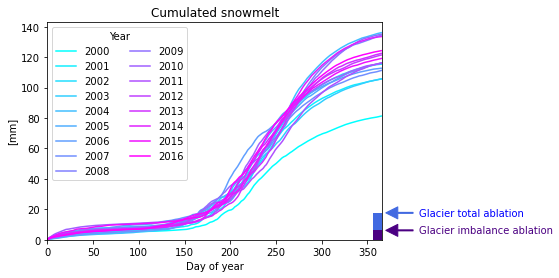

In [26]:
# Plot cumulated snowmelt, compare to glacier ablation
t0,tf = 0,366
ax = snowmelt_mm.plot(colormap='cool')
ax.annotate('Glacier total ablation', xy=(tf, TotAbl),
            verticalalignment='center', xytext=(tf+40, TotAbl),
            arrowprops=dict(color='royalblue', shrink=0.1, width=1),
           **{'color':'blue'})
ax.annotate('Glacier imbalance ablation', xy=(tf, ImAbl),
            verticalalignment='center', xytext=(tf+40, ImAbl),
            arrowprops=dict(color='indigo', shrink=0.1, width=1),
           **{'color':'indigo'})
ax.set(ylabel='[mm]', title='Cumulated snowmelt')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(loc='upper left',ncol=2, title='Year')
ax.add_patch(patches.Rectangle((tf-10, 0), tf, TotAbl, facecolor = 'royalblue'))
ax.add_patch(patches.Rectangle((tf-10, 0), tf, ImAbl, facecolor = 'indigo'));

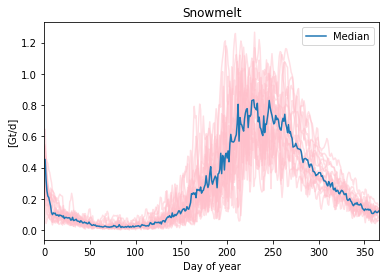

In [65]:
# from 1e-3 m3/d to Gt/d 
snowmelt_Gtd = snowmelt_m3.applymap(lambda x: x*1e-12)
ax = snowmelt_Gtd.plot(color='pink', alpha=0.5)
h = ax.plot(snowmelt_Gtd.median(axis=1))
ax.legend(h,('Median',))
ax.set_xlim(left=t0, right=tf)
ax.set(ylabel='[Gt/d]', title='Snowmelt');

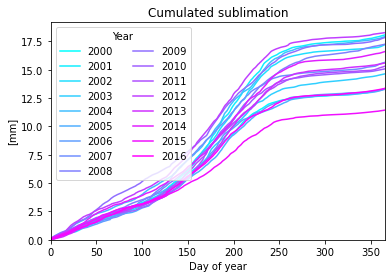

In [20]:
ax = sublim_mm.plot(colormap='cool')
ax.set(ylabel='[mm]', title='Cumulated sublimation')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(loc='upper left',ncol=2, title='Year');

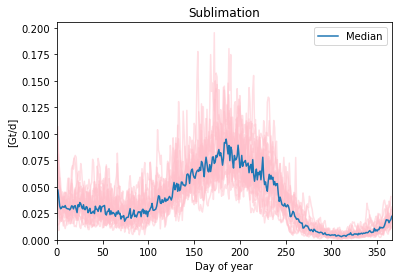

In [68]:
# from 1e-3 m3/d to Gt/d 
sublim_Gtd = sublim_m3.applymap(lambda x: x*1e-12)
ax = sublim_Gtd.plot(color='pink', alpha=0.5, legend=None)
h = ax.plot(sublim_Gtd.median(axis=1))
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(h,('Median',))
ax.set(ylabel='[Gt/d]', title='Sublimation');

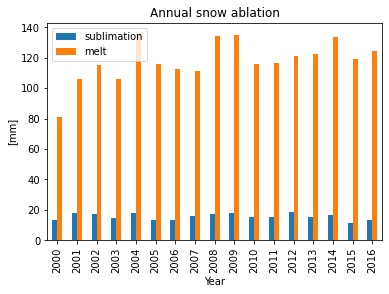

In [69]:
# Compare annual melt and sublimation
sm = pd.concat([sublim_mm.max(),snowmelt_mm.max()], axis=1, 
               keys=['sublimation', 'melt'])
ax = sm.plot.bar()
ax.set(ylabel='[mm]', title='Annual snow ablation');

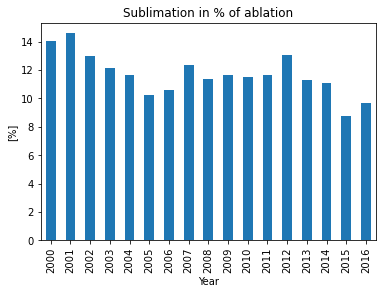

In [72]:
# plot sublimation:ablation ratio
sublimRatio = 100*sublim_mm.max()/(snowmelt_mm.max()+sublim_mm.max())
ax = sublimRatio.plot.bar()
ax.set(ylabel='[%]', title='Sublimation in % of ablation');

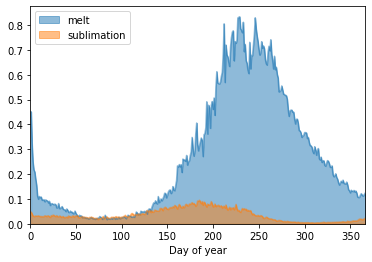

In [94]:
med = pd.concat([snowmelt_Gtd.median(axis=1), sublim_Gtd.median(axis=1)], axis=1,
               keys=['melt', 'sublimation'])
ax = med.plot.area(stacked = False)
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0);